In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings # Pour éviter les warnings
warnings.filterwarnings('ignore')

c:\Users\KHALFALLAH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('Boston.csv', sep=',')

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
# Suppression de la colonne Unnamed jugée inutile
data.drop('Unnamed: 0',axis=1, inplace=True)
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
# Renommage des colonnes 
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]


# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1. **Taux_criminalite :** Taux de criminalité par habitant par ville.
2. **Prop_terrains_resid :** Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
3. **Prop_acres_indus :** Proportion d'acres industriels non commerciaux par ville.
4. **Bordure_riviere :** Variable fictive Charles River (= 1 si le tronçon borde la rivière ; 0 sinon).
5. **Concentration_NO2 :** Concentration de dioxyde d'azote (parties par 10 millions).
6. **Nb_pieces_logement :** Nombre moyen de pièces par logement.
7. **Prop_log_construits_av1940 :** Proportion de logements occupés par leur propriétaire construits avant 1940.
8. **Dist_ponderees_emploi :** Distances pondérées aux cinq centres d'emploi de Boston.
9. **Accessibilite_autoroute :** Indice d'accessibilité aux autoroutes radiales.
10. **Taux_impot_foncier :** Taux d'impôt foncier sur la valeur totale de la propriété.
11. **Ratio_eleve_prof :** Ratio élève-professeur par ville.
12. **Prop_noirs_ville :** Proportion de la population noire par ville.
13. **Pourcentage_pop_inf :** Pourcentage de statut inférieur de la population.
14. **Valeur_med_logement :** Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars

# **Exploration initiale**

In [6]:
# Dimensions du dataset
data.shape

(506, 14)

In [7]:
# Informations de la base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Taux_criminalite            506 non-null    float64
 1   Prop_terrains_resid         506 non-null    float64
 2   Prop_acres_indus            506 non-null    float64
 3   Bordure_riviere             506 non-null    int64  
 4   Concentration_NO2           506 non-null    float64
 5   Nb_pieces_logement          506 non-null    float64
 6   Prop_log_construits_av1940  506 non-null    float64
 7   Dist_ponderees_emploi       506 non-null    float64
 8   Accessibilite_autoroute     506 non-null    int64  
 9   Taux_impot_foncier          506 non-null    int64  
 10  Ratio_eleve_prof            506 non-null    float64
 11  Prop_noirs_ville            506 non-null    float64
 12  Pourcentage_pop_inf         506 non-null    float64
 13  Valeur_med_logement         506 non

In [8]:
# Pourcentages des valeurs manquantes de chacune des variables de notre dataset
(data.isna().sum()/data.shape[0]).sort_values(ascending = False)*100

Taux_criminalite              0.0
Prop_terrains_resid           0.0
Prop_acres_indus              0.0
Bordure_riviere               0.0
Concentration_NO2             0.0
Nb_pieces_logement            0.0
Prop_log_construits_av1940    0.0
Dist_ponderees_emploi         0.0
Accessibilite_autoroute       0.0
Taux_impot_foncier            0.0
Ratio_eleve_prof              0.0
Prop_noirs_ville              0.0
Pourcentage_pop_inf           0.0
Valeur_med_logement           0.0
dtype: float64

In [9]:
#Analyse des lignes dupliquées 
data.duplicated().sum()

0

# **Analyse exploratoire**

In [10]:
numCols = data[["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf","Valeur_med_logement"]].columns.tolist()

### **Analyse univariée**

In [22]:
#Statisques descriptives des variables numériques
data[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Taux_criminalite,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Prop_terrains_resid,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Prop_acres_indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
Bordure_riviere,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
Concentration_NO2,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
Nb_pieces_logement,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
Prop_log_construits_av1940,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Dist_ponderees_emploi,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
Accessibilite_autoroute,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
Taux_impot_foncier,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


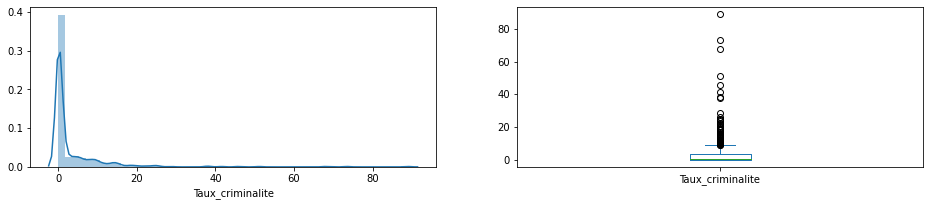

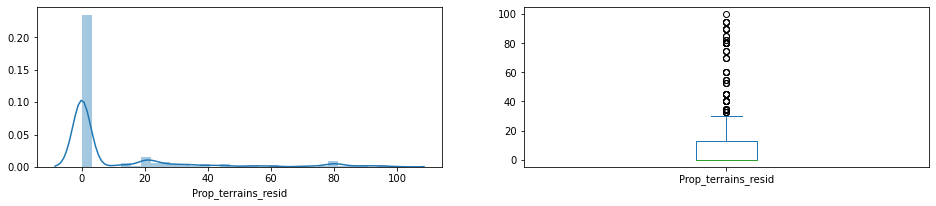

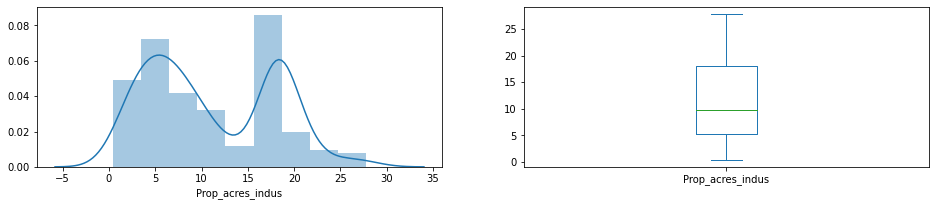

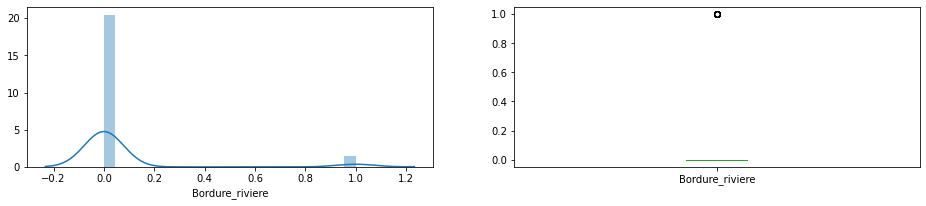

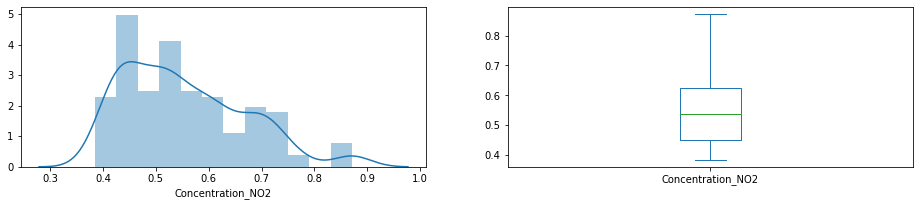

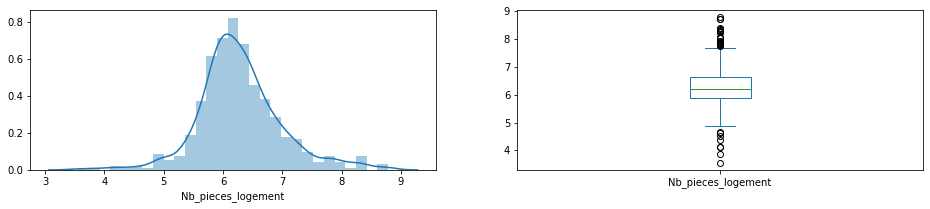

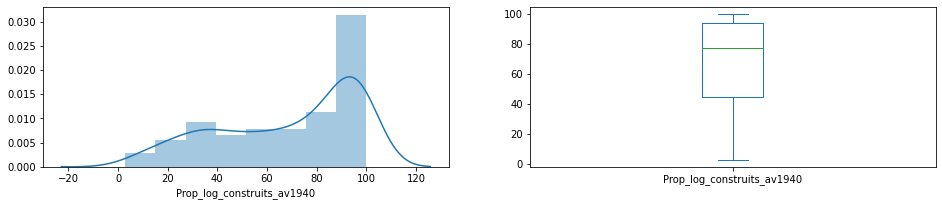

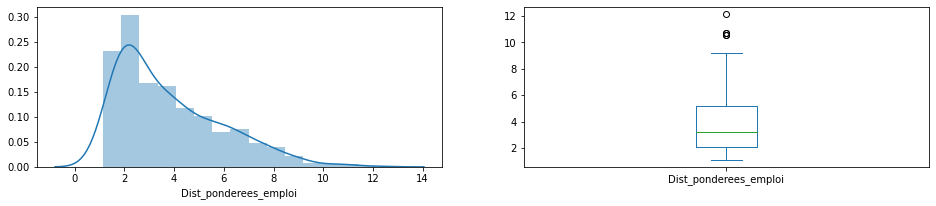

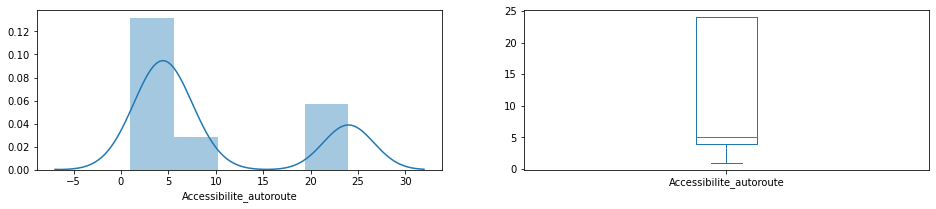

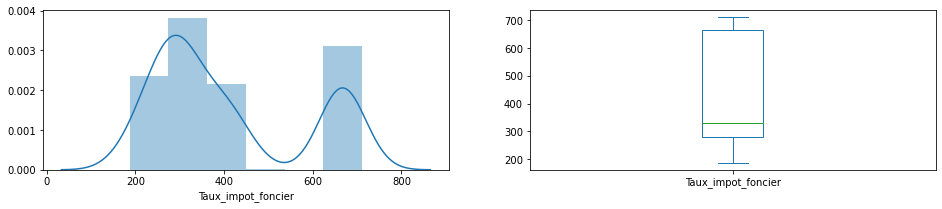

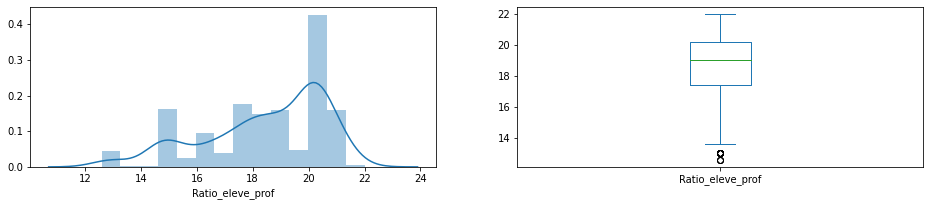

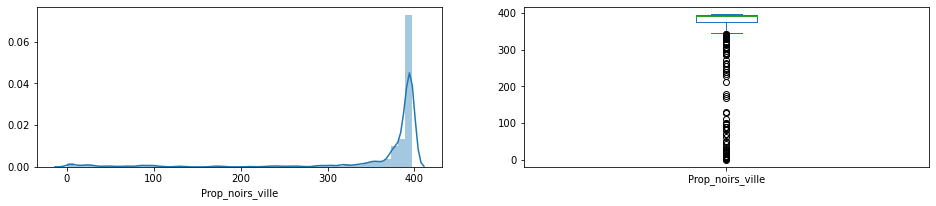

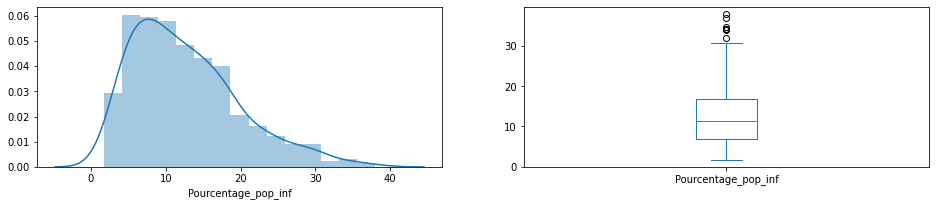

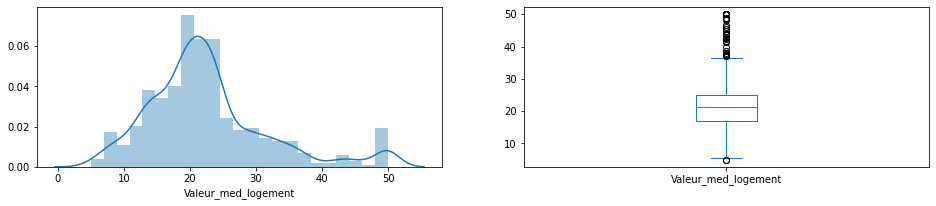

In [23]:
#Distribution des variables quantitatives
for col in numCols:
    plt.subplot(321)
    sns.distplot(data[col])

    plt.subplot(322)
    data[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

In [24]:
data.columns

Index(['Taux_criminalite', 'Prop_terrains_resid', 'Prop_acres_indus',
       'Bordure_riviere', 'Concentration_NO2', 'Nb_pieces_logement',
       'Prop_log_construits_av1940', 'Dist_ponderees_emploi',
       'Accessibilite_autoroute', 'Taux_impot_foncier', 'Ratio_eleve_prof',
       'Prop_noirs_ville', 'Pourcentage_pop_inf', 'Valeur_med_logement'],
      dtype='object')

On peut remarquer que les variables **Valeur_med_logement,Prop_noirs_ville,Nb_pieces_logement,Prop_terrains_resid et Taux_criminalite**, présentent
beaucoup de valeurs abérrantes.

### **Analyse bivariée**

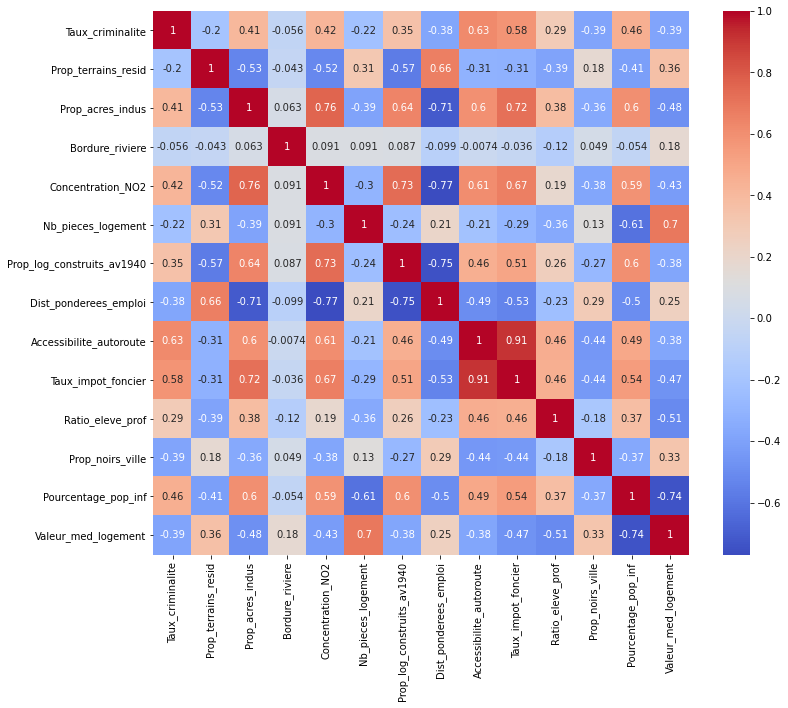

In [12]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [26]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable cible
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable cible
print("Variables ayant une corrélation supérieure à 0.6 avec la variable cible (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable cible (Valeur_med_logement) :

['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [27]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :

[]


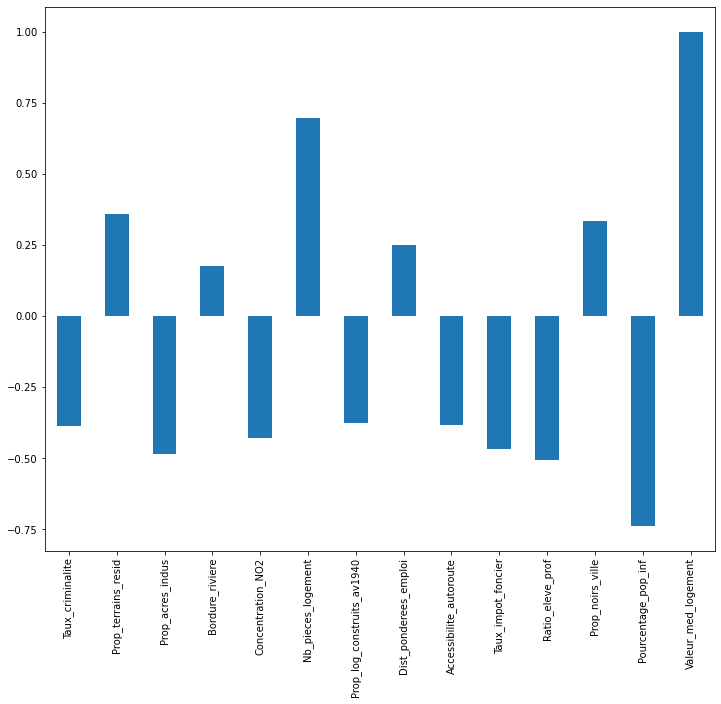

In [34]:
#Diagramme en barre pour mieux voir la corrélation entre variables cible et numériques
plt.figure(figsize=(12,10))
data[numCols].corr()["Valeur_med_logement"].plot.bar()

In [13]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute


In [14]:

# Extraction des couples de variables ayant une corrélation inférieure à -0.8
corr_threshold = -0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inférieure à -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inférieure à -0.8 :



# **Prétraitement des données**

## **Remplacement des valeurs aberrantes (outliers)**

In [15]:
#définition d'une fonction de suppression de valeurs aberrantes
def replace_outliers(df, numVar):
  Q1 = np.percentile(df[numVar], 25)
  Q3 = np.percentile(df[numVar], 75)
  IQR = Q3 - Q1
  min = Q1 - 1.5*IQR
  max = Q3 + 1.5*IQR
  #dataframeOut = dataframe.copy()
  df.loc[df[numVar] < min , numVar] = min 
  df.loc[df[numVar] > max, numVar] = max #

In [16]:
df = data.copy()

In [17]:
for col in numCols: 
    replace_outliers(df, col)

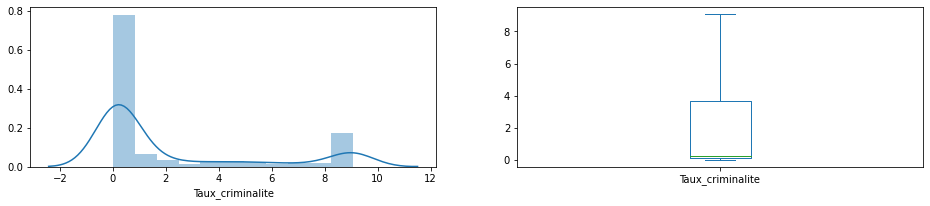

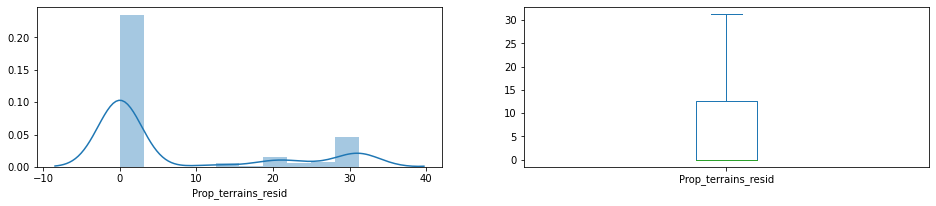

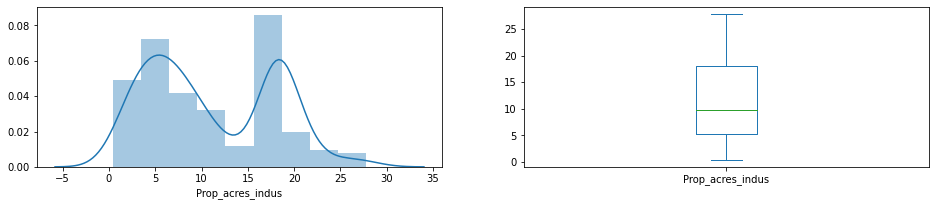

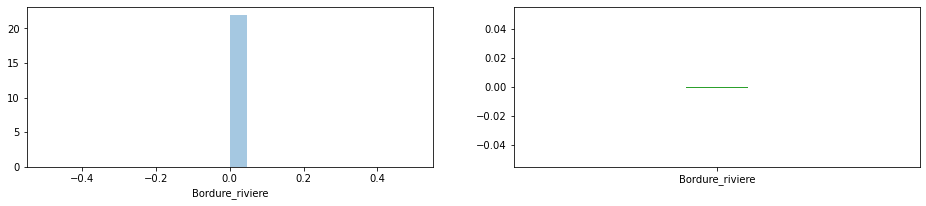

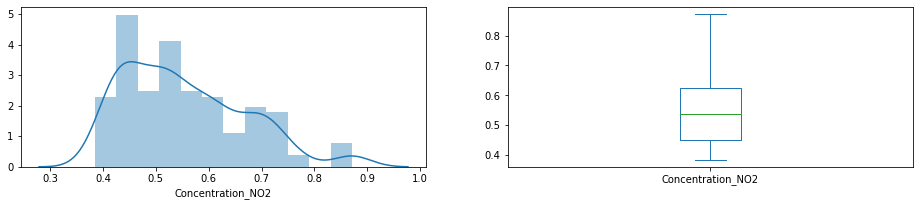

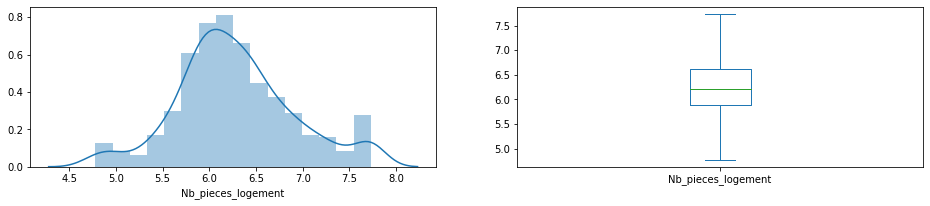

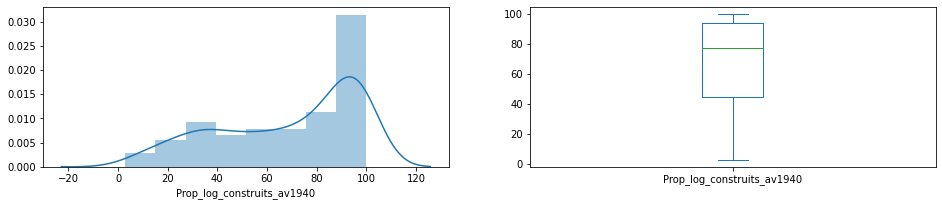

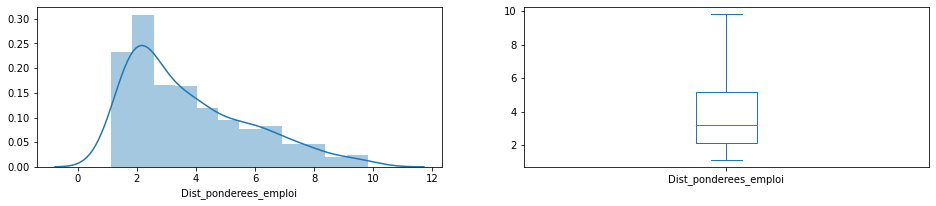

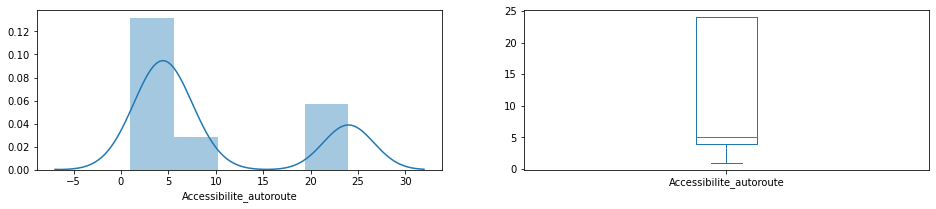

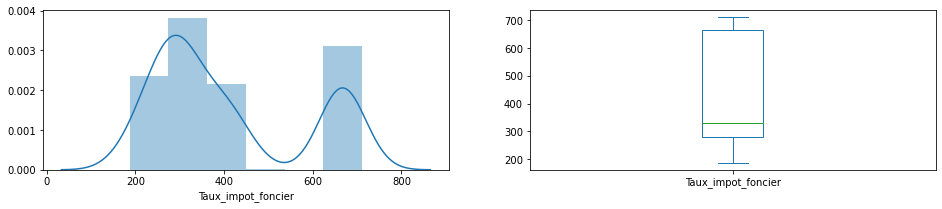

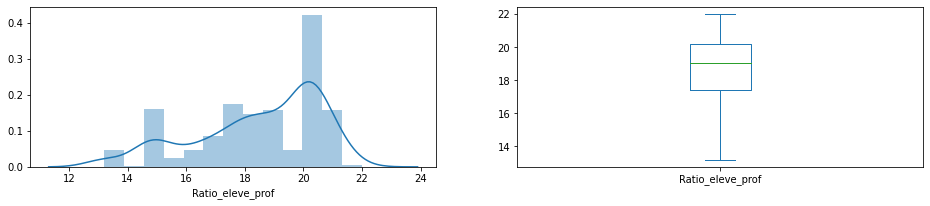

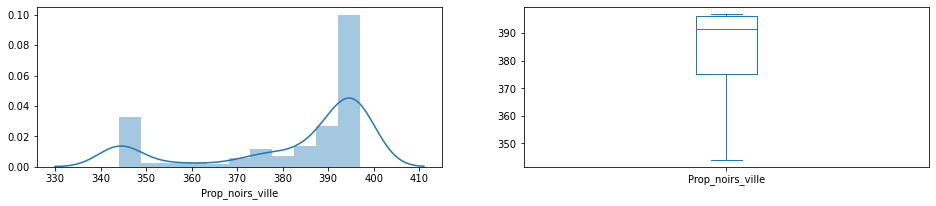

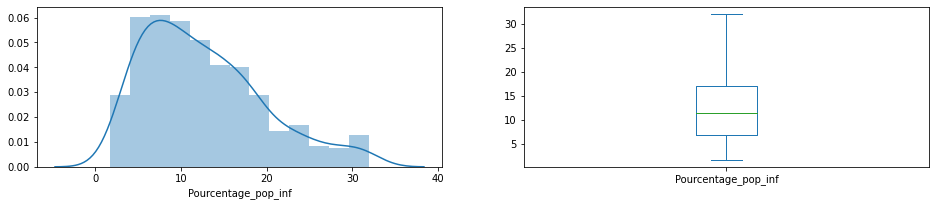

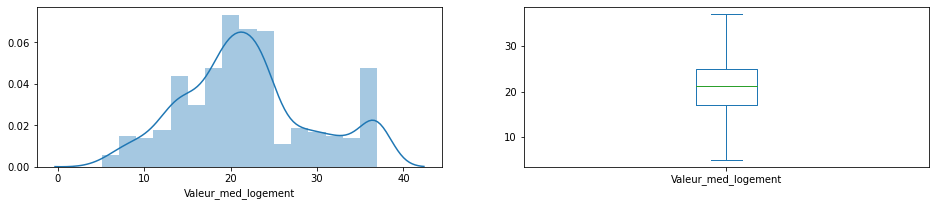

In [18]:
#Distribution des variables quantitatives après remplacement afin de  vérifier les outliers
for col in numCols:
    plt.subplot(321)
    sns.distplot(df[col])

    plt.subplot(322)
    df[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

Il est à remarquer que tous les outliers ont bel et bien été remplacés.

## **Division de la base en train/test (80 - 20)**

In [19]:
#importation de la fonction de découpage (train_test_split)
from sklearn.model_selection import train_test_split 

In [21]:
X = df.drop("Valeur_med_logement", axis=1)
y = df["Valeur_med_logement"]

In [22]:
#découpage 80 - 20
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )

In [23]:
print("Dimensions X_train :", X_train.shape)
print("Dimensions y_train :", y_train.shape)
print("Dimensions X_test :", X_test.shape)
print("Dimensions y_test :", y_test.shape)

Dimensions X_train : (404, 13)
Dimensions y_train : (404,)
Dimensions X_test : (102, 13)
Dimensions y_test : (102,)


## **Normalisation des variables quantitatives**

In [24]:
#importation de l'algorithme
from sklearn.preprocessing import StandardScaler
#instanciation
standardScaler = StandardScaler()

In [25]:
numCols.remove("Valeur_med_logement")
numCols

['Taux_criminalite',
 'Prop_terrains_resid',
 'Prop_acres_indus',
 'Bordure_riviere',
 'Concentration_NO2',
 'Nb_pieces_logement',
 'Prop_log_construits_av1940',
 'Dist_ponderees_emploi',
 'Accessibilite_autoroute',
 'Taux_impot_foncier',
 'Ratio_eleve_prof',
 'Prop_noirs_ville',
 'Pourcentage_pop_inf']

In [26]:
## Données d'entraînement
#copie du dataframe précédent
X_trainScaledStandard = X_train.copy()
#standard scaler
X_trainScaledStandard[numCols] = standardScaler.fit_transform(X_train[numCols])
#apperçu
X_trainScaledStandard.head()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf
477,2.087201,-0.592657,1.033237,0.0,0.489252,-1.572008,1.028015,-0.809679,1.706891,1.578434,0.849968,-1.693329,1.783519
15,-0.477185,-0.592657,-0.413160,0.0,-0.157233,-0.736839,-0.431199,0.333949,-0.624360,-0.584648,1.213244,0.727348,-0.564854
332,-0.657230,1.969335,-0.715218,0.0,-1.008723,-0.426408,-1.618599,1.355580,-0.974048,-0.602724,-0.648547,-1.023367,-0.656275
423,1.473851,-0.592657,1.033237,0.0,0.489252,-0.312951,0.591681,-0.847309,1.706891,1.578434,0.849968,-1.975256,1.552110
19,-0.447292,-0.592657,-0.413160,0.0,-0.157233,-0.905448,0.033747,-0.000903,-0.624360,-0.584648,1.213244,0.482342,-0.163459


In [27]:
## Données de test
#copie du dataframe précédent
X_testScaledStandard = X_test.copy()
#standard scaler
X_testScaledStandard[numCols] = standardScaler.transform(X_test[numCols])
#apperçu
X_testScaledStandard.head()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf
173,-0.639880,-0.592657,-1.007111,0.0,-0.395412,0.180272,0.555916,-0.549467,-0.507797,-0.650926,-0.784776,0.721052,-0.483432
274,-0.650615,1.969335,-0.664391,0.0,-0.931315,0.719193,-1.275254,0.133162,-0.624360,-0.903989,-0.330680,0.794501,-1.270509
491,-0.635639,-0.592657,2.433163,0.0,0.446720,-0.502046,1.081663,-0.920613,-0.624360,1.849573,0.804558,0.438272,0.806458
72,-0.639922,-0.592657,-0.025421,0.0,-1.220532,-0.372831,-2.172957,0.710103,-0.624360,-0.596698,0.395872,0.480243,-0.986247
452,0.878412,-0.592657,1.033237,0.0,1.331384,-0.007247,0.831307,-0.682101,1.706891,1.578434,0.849968,0.174905,0.692182


# **Modélisation**

## **Entrainement standard**

In [28]:
#importation du f1_score
from sklearn.metrics import r2_score
#importation du la fonction time()
from time import time

In [29]:
#Définition de fonction
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train_scaled , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test
    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "r2_train_score" : r2_score(y_train , y_pred_train) ,
                   "r2_test_score" : r2_score(y_test , y_pred_test)})
  return pd.DataFrame(scores)

In [30]:
  # importation des algorithmes
  from sklearn.linear_model import LinearRegression
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.svm import SVR
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor

In [31]:
#liste de modeles
ModelsList = [RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor,
              DecisionTreeRegressor , KNeighborsRegressor, LinearRegression , SVR]

In [32]:
#premier essai de modélisation
scores = modelisation(ModelsList ,X_trainScaledStandard, y_train , X_testScaledStandard , y_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,0.776822,0.980031,0.879520
AdaBoostRegressor,0.423380,0.898343,0.849267
GradientBoostingRegressor,0.244204,0.972292,0.872662
DecisionTreeRegressor,0.005192,1.000000,0.736550
KNeighborsRegressor,0.007935,0.887768,0.828675
LinearRegression,0.174783,0.788235,0.754498
SVR,0.018212,0.823996,0.784267


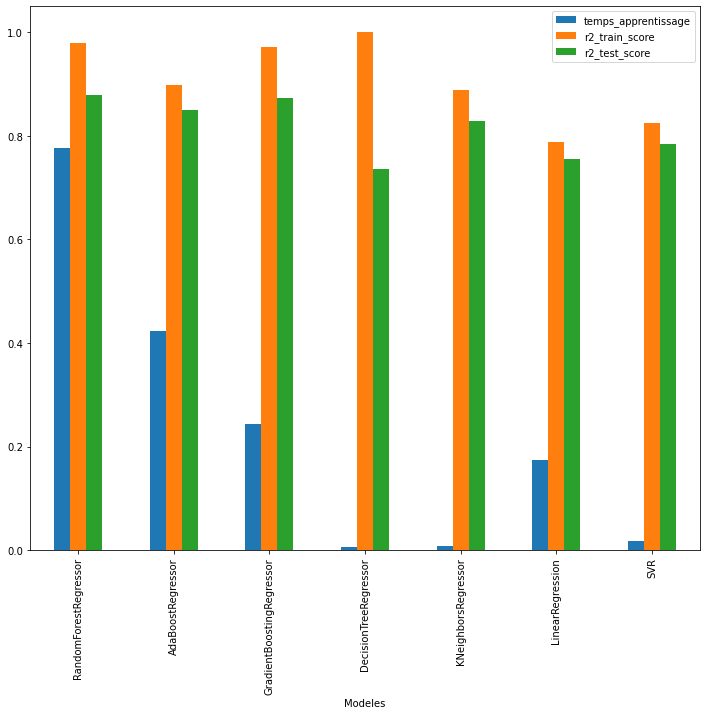

In [33]:
#visualisation 
scores.plot.bar(figsize=(12,10))
plt.show()

## **Entrainement par validation croisée**

In [34]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [35]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train_scaled , y_train):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train_scaled , y = y_train , cv = 5 ,
               scoring = 'r2', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin
    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "r2_train_score" : score['train_score'].mean() ,
                   "r2_test_score" : score['test_score'].mean()})
  return pd.DataFrame(scores)

In [36]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_trainScaledStandard, y_train)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,16.563109,0.977940,0.845325
AdaBoostRegressor,1.035516,0.899920,0.804148
GradientBoostingRegressor,0.929738,0.978477,0.863408
DecisionTreeRegressor,0.084581,1.000000,0.695560
KNeighborsRegressor,0.110513,0.879015,0.801899
LinearRegression,0.140536,0.789547,0.768381
SVR,0.157887,0.811725,0.783922


In [37]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,1.000000,0.977940,0.845325
AdaBoostRegressor,0.062519,0.899920,0.804148
GradientBoostingRegressor,0.056133,0.978477,0.863408
DecisionTreeRegressor,0.005107,1.000000,0.695560
KNeighborsRegressor,0.006672,0.879015,0.801899
LinearRegression,0.008485,0.789547,0.768381
SVR,0.009532,0.811725,0.783922


L'algorithme GradientBoostingRegressor reste le meilleur algorithme pour les deux méthodes d'entrainement car ayant un très bon sens de généralisation et le meilleur temps d'éxecution.

## **Optimisation de l'algorithme choisi comme meilleur**


In [38]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Sélection d'hyperparamètres
tuned_parameters = [{'n_estimators' :[500,1000,2000],'learning_rate' :[.001,0.01,.1],'max_depth' :[1,2,4],'subsample' :[0.5,0.75,1],'random_state' :[1]}]

In [47]:
model_grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=tuned_parameters, scoring ='r2',cv =5)
model_grid.fit(X_trainScaledStandard, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1],
                          'max_depth': [1, 2, 4],
                          'n_estimators': [500, 1000, 2000],
                          'random_state': [1], 'subsample': [0.5, 0.75, 1]}],
             scoring='r2')

In [48]:
print("meilleur score:",model_grid.best_score_)
print("meilleurs parametres:",model_grid.best_params_)

meilleur score: 0.8723775360758026
meilleurs parametres: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 2000, 'random_state': 1, 'subsample': 0.5}


In [83]:
best_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators =2000, random_state = 42, subsample = 0.5)
best_model.fit(X_trainScaledStandard, y_train)
pred_best_train = best_model.predict(X_trainScaledStandard)
pred_best_test = best_model.predict(X_testScaledStandard)


In [84]:
print("r2_train_score: ", r2_score(y_train,pred_best_train))
print("r2_test_score: ",  r2_score(y_test,pred_best_test))

r2_train_score:  0.9972201618928258
r2_test_score:  0.9019659591833489


# **Déploiement**

In [86]:
import joblib

In [87]:
# Enregistrement de notre modèle
joblib.dump(value=best_model, filename ='House predicti Boston.pkl')

['House predicti Boston.pkl']